In [367]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [368]:
stock='ADANIENT.NS'
data=yf.download(stock,'2021-08-28','2023-08-25',interval='1h')

[*********************100%***********************]  1 of 1 completed


In [369]:
data['High-Low'] = data['High'] - data['Low']
data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))
data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose'], axis=1, inplace=True)

period = 14

data['ATR'] = data['TrueRange'].rolling(period).mean()
data.drop('TrueRange', axis=1, inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,ATR
Datetime,,,,,,,
2021-08-30 09:15:00+05:30,1512.849976,1520.699951,1511.199951,1512.099976,1512.099976,0,NaN
2021-08-30 10:15:00+05:30,1512.150024,1513.199951,1494.199951,1504.650024,1504.650024,1091270,NaN
2021-08-30 11:15:00+05:30,1504.150024,1509.449951,1500.000000,1503.099976,1503.099976,260345,NaN
2021-08-30 12:15:00+05:30,1503.500000,1511.000000,1503.050049,1509.300049,1509.300049,222574,NaN
2021-08-30 13:15:00+05:30,1509.300049,1527.000000,1507.000000,1521.000000,1521.000000,483523,NaN
...,...,...,...,...,...,...,...
2023-08-24 11:15:00+05:30,2575.250000,2603.949951,2567.500000,2588.750000,2588.750000,517365,36.867833
2023-08-24 12:15:00+05:30,2587.500000,2589.949951,2569.350098,2569.350098,2569.350098,212317,37.249965
2023-08-24 13:15:00+05:30,2568.350098,2579.250000,2535.000000,2570.100098,2570.100098,563456,38.771397


In [370]:
data['Typical']=(data['High']+data['Low']+data['Close'])/3
data['Vwap'] = (data['Typical'] * data['Volume']).cumsum() / data['Volume'].cumsum()

data

,Open,High,Low,Close,Adj Close,Volume,ATR,Typical,Vwap
Datetime,,,,,,,,,
2021-08-30 09:15:00+05:30,1512.849976,1520.699951,1511.199951,1512.099976,1512.099976,0,NaN,1514.666626,NaN
2021-08-30 10:15:00+05:30,1512.150024,1513.199951,1494.199951,1504.650024,1504.650024,1091270,NaN,1504.016642,1504.016642
2021-08-30 11:15:00+05:30,1504.150024,1509.449951,1500.000000,1503.099976,1503.099976,260345,NaN,1504.183309,1504.048745
2021-08-30 12:15:00+05:30,1503.500000,1511.000000,1503.050049,1509.300049,1509.300049,222574,NaN,1507.783366,1504.576782
2021-08-30 13:15:00+05:30,1509.300049,1527.000000,1507.000000,1521.000000,1521.000000,483523,NaN,1518.333333,1507.809309
...,...,...,...,...,...,...,...,...,...
2023-08-24 11:15:00+05:30,2575.250000,2603.949951,2567.500000,2588.750000,2588.750000,517365,36.867833,2586.733317,2237.334652
2023-08-24 12:15:00+05:30,2587.500000,2589.949951,2569.350098,2569.350098,2569.350098,212317,37.249965,2576.216715,2237.386826
2023-08-24 13:15:00+05:30,2568.350098,2579.250000,2535.000000,2570.100098,2570.100098,563456,38.771397,2561.450033,2237.519179


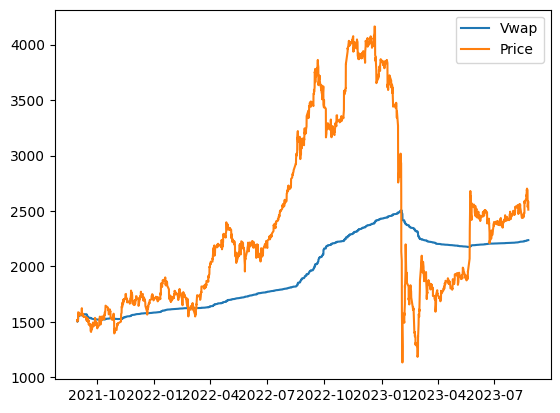

In [371]:
plt.plot(data['Vwap'],label='Vwap')
plt.plot(data['Typical'],label='Price')
plt.legend()

In [372]:
atr_multiplier = 1.2

data['UpperBand'] = data['Typical'] + atr_multiplier * data['ATR']
data['LowerBand'] = data['Typical'] - atr_multiplier * data['ATR']

In [373]:
buy_signals=[]
sell_signals=[]
signals=[]

status=''
for i in range(len(data)):
    if (data['Typical'][i] < data['LowerBand'][i] or data['Close'][i] < data['Vwap'][i]) and status != 'SELL':
        sell_signals.append(i)
        signals.append(('SELL'))
        status = 'SELL'
    elif (data['Typical'][i] > data['UpperBand'][i] or data['Close'][i] > data['Vwap'][i]) and status != 'BUY':
        buy_signals.append(i)
        signals.append(('BUY'))
        status = 'BUY'
    else:
        signals.append(('NONE'))

print(sell_signals)
print(buy_signals)
print(signals)

[2, 32, 42, 50, 52, 140, 182, 194, 197, 211, 264, 266, 285, 526, 853, 855, 862, 888, 893, 910, 2476, 3144]
[1, 3, 33, 49, 51, 138, 173, 190, 196, 200, 212, 265, 271, 324, 528, 854, 861, 869, 890, 909, 911, 2976, 3145]
['NONE', 'BUY', 'SELL', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'BUY', 'SELL', 'BUY', 'SELL', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'N

In [374]:
investment=100000 #100k
number_of_stocks=investment//(data['Close'][0])
in_hand = investment - number_of_stocks * data['Close'][0]
returns=[]

for i in range(len(signals)):
    if signals[i][1]=='BUY':
        temp = in_hand // data['Close'][i]
        in_hand -= temp * data['Close'][i]
        combined_number_of_stocks += temp
    elif signals[i][1]=='SELL':
        in_hand += combined_number_of_stocks * data['Close'][i]
        combined_number_of_stocks = 0
    returns.append(in_hand+number_of_stocks*data['Close'][i])

print("The return on investing 100000 rupees is:",returns[-1])

combined_percentage_returns=format((((returns[-1])-(investment))/investment)*(100),".2f")
print("The percentage return in case of combined strategy is:",combined_percentage_returns,"%")

The return on investing 100000 rupees is: 164920.90161132812
The percentage return in case of combined strategy is: 64.92 %


In [375]:
pnl=[]
for i in range(len(returns)):
    pnl.append(((returns[i]-investment)/investment)*100)
pnl[-1]

64.92090161132813

In [376]:
sharpe=(np.mean(pnl)-0.03)/np.std(pnl)
sharpe

1.096568075867541